<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/OLA%20Ensemble%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

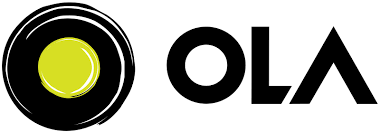

Ola is a leading ride-sharing platform, aiming to provide reliable, affordable, and
convenient urban transportation for everyone.

# **Business Problem**

* The constant challenge Ola faces is the churn rate of its drivers. Ensuring driver loyalty and reducing attrition are crucial to the company's operation.
* Analyzing driver data can reveal patterns in driver behavior, performance, and satisfaction. This would help in foreseeing potential churn, allowing proactive measures.
* Analyzing driver data can reveal patterns in driver behavior, performance, and satisfaction. This would help in foreseeing potential churn, allowing proactive measures.



# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.
* Convert date-like features to their respective data type
* Check for missing values and Prepare data for KNN Imputation,consider only numerical features for this purpose
* Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)
** You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)
* Feature Engineering Steps:
** Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1
** Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1
** Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1
* Statistical summary of the derived dataset
** Check correlation among independent variables and how they interact with each other
* One hot encoding of the categorical variable
* Class Imbalance Treatment
* Standardization of training data
* Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning
* Results Evaluation:
** Classification Report
** ROC AUC curve
** Provide actionable Insights & Recommendations

# **Loading Modules and Data**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import  kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.impute import KNNImputer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

**Description of each column in data**
* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [ ]:
data.shape

(19104, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
data.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
data[data.Driver_ID == 4]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


* Same Driver ID has Many Rows...later we will merge all the Rows after extracting information

# **Data Overview & Cleaning**

## Dropping Irrelevant columns

In [3]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [4]:
data.drop(['Unnamed: 0'], axis = 1,inplace= True)

In [5]:
data.shape

(19104, 13)

## Datatype Conversion of Features

In [6]:
data["MMM-YY"]=data["MMM-YY"].astype("datetime64")
data["Dateofjoining"]=data["Dateofjoining"].astype("datetime64")
data["LastWorkingDate"]=data["LastWorkingDate"].astype("datetime64")

In [ ]:
data.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  float64       
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  float64       
 6   Income                19104 non-null  float64       
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  float64       
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

## Missingvalues & Their Treatment

In [7]:
data.isna().sum(axis = 0)

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

* we will impute missing values through KNN Imputation
* we need not treat "LastWorkingDate" becoz if driver has not left...it will be represented as Nan Only....later we will deal it by creating new feature

### Gender

In [8]:
data.loc[data.Gender.isna()]["Driver_ID"].value_counts()

49      2
1205    1
1312    1
1407    1
1452    1
1508    1
1621    1
1804    1
1877    1
1936    1
2057    1
2073    1
2093    1
43      1
2228    1
2478    1
2517    1
2607    1
2693    1
2716    1
2728    1
2732    1
2738    1
2760    1
2765    1
2215    1
1156    1
1143    1
1028    1
68      1
116     1
119     1
225     1
296     1
354     1
365     1
407     1
439     1
446     1
489     1
516     1
541     1
611     1
640     1
709     1
793     1
888     1
951     1
1004    1
1023    1
2774    1
Name: Driver_ID, dtype: int64

In [9]:
data[data["Driver_ID"]==2774]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19023,2019-01-01,2774,40.0,0.0,C15,1,42313,2018-07-21,NaT,1,1,450010,4
19024,2019-02-01,2774,NaN,0.0,C15,1,42313,2018-07-21,NaT,1,1,1141280,4
19025,2019-03-01,2774,40.0,0.0,C15,1,42313,2018-07-21,NaT,1,1,2335840,4
19026,2019-04-01,2774,40.0,0.0,C15,1,42313,2018-07-21,NaT,1,1,106880,2
19027,2019-05-01,2774,40.0,0.0,C15,1,42313,2018-07-21,NaT,1,1,250000,2
19028,2019-06-01,2774,40.0,NaN,C15,1,42313,2018-07-21,NaT,1,1,0,2
19029,2019-07-01,2774,41.0,0.0,C15,1,42313,2018-07-21,2019-07-19,1,1,0,1


* As we can see rest of the Same Driver ID rows have Gender mentioned
* So we will use Nearest Neighbour as 1 as it is Categorical
* We will selected only columns ["Driver_ID","Educational_Level","Income","Dateofjoining","Joining Designation"] for fitting of KNN Imputer

In [10]:
GenderKNN = KNNImputer(n_neighbors=1)
GenderKNN.fit(data[["Driver_ID","Education_Level","Gender","Income","Joining Designation"]])
data[["Driver_ID","Education_Level","Gender","Income","Joining Designation"]]=GenderKNN.transform(data[["Driver_ID","Education_Level","Gender","Income","Joining Designation"]])

In [11]:
data.isna().sum(axis = 0)

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
data[data["Driver_ID"]==2774]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19023,2019-01-01,2774.0,40.0,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,450010,4
19024,2019-02-01,2774.0,NaN,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,1141280,4
19025,2019-03-01,2774.0,40.0,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,2335840,4
19026,2019-04-01,2774.0,40.0,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,106880,2
19027,2019-05-01,2774.0,40.0,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,250000,2
19028,2019-06-01,2774.0,40.0,0.0,C15,1.0,42313.0,2018-07-21,NaT,1.0,1,0,2
19029,2019-07-01,2774.0,41.0,0.0,C15,1.0,42313.0,2018-07-21,2019-07-19,1.0,1,0,1


* All missing values in Gender have been imputed using KNN

### Age

In [13]:
data.loc[data.Age.isna()]["Driver_ID"].value_counts()

2073.0    2
49.0      2
901.0     2
718.0     2
1936.0    1
1421.0    1
1430.0    1
1462.0    1
1588.0    1
1611.0    1
1669.0    1
1720.0    1
1852.0    1
1909.0    1
1932.0    1
20.0      1
1247.0    1
2168.0    1
2273.0    1
2348.0    1
2351.0    1
2460.0    1
2507.0    1
2569.0    1
2618.0    1
2690.0    1
2730.0    1
2738.0    1
2751.0    1
1378.0    1
1050.0    1
1072.0    1
22.0      1
24.0      1
40.0      1
63.0      1
69.0      1
103.0     1
120.0     1
167.0     1
179.0     1
183.0     1
204.0     1
215.0     1
305.0     1
313.0     1
325.0     1
369.0     1
422.0     1
458.0     1
541.0     1
560.0     1
607.0     1
617.0     1
778.0     1
954.0     1
2774.0    1
Name: Driver_ID, dtype: int64

In [14]:
data[data["Driver_ID"]==2073]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
13906,2019-01-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,72000,1
13907,2019-02-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,250000,1
13908,2019-03-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,50000,1
13909,2019-04-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13910,2019-05-01,2073.0,NaN,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,100310,1
13911,2019-06-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,116380,1
13912,2019-07-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13913,2019-08-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13914,2019-09-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,256240,1
13915,2019-10-01,2073.0,NaN,0.0,C27,0.0,42380.0,2018-12-31,2019-10-07,1.0,1,155200,2


In [15]:
AgeKNN = KNNImputer(n_neighbors=1)
AgeKNN.fit(data[["Driver_ID","Education_Level","Age","Gender","Income","Joining Designation"]])
data[["Driver_ID","Education_Level","Age","Gender","Income","Joining Designation"]]=AgeKNN.transform(data[["Driver_ID","Education_Level","Age","Gender","Income","Joining Designation"]])

In [16]:
data.isna().sum(axis=0)

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [17]:
data[data["Driver_ID"]==2073]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
13906,2019-01-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,72000,1
13907,2019-02-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,250000,1
13908,2019-03-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,50000,1
13909,2019-04-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13910,2019-05-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,100310,1
13911,2019-06-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,116380,1
13912,2019-07-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13913,2019-08-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,0,1
13914,2019-09-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,NaT,1.0,1,256240,1
13915,2019-10-01,2073.0,21.0,0.0,C27,0.0,42380.0,2018-12-31,2019-10-07,1.0,1,155200,2


* All Missing Values in the Age are correcly Imputed using KNN imputer

## Duplicate Values & Their Treatment

In [ ]:
data.loc[data.duplicated()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


No duplicate rows found

## Row Merging as per Driver_ID

In [18]:
data.sort_values(by=["Driver_ID","MMM-YY"], ascending=[True,True],inplace = True,ignore_index=True)

In [19]:
data.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [20]:
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1,2381060,2
1,2019-02-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1,-665480,2
2,2019-03-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1,0,2
3,2020-11-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2,0,1
4,2020-12-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2,0,1


In [21]:
d1 = data.groupby(["Driver_ID"]).agg({'Age' : 'first',
'Gender' : 'first' ,
'City' : 'first',
'Education_Level' : 'first',
'Income' : 'first',
'Dateofjoining' : 'first',
'LastWorkingDate' : 'last',
'Joining Designation' : 'first',
'Grade' : 'first',
'Total Business Value' : 'mean',
'Quarterly Rating' : 'first'}).reset_index()

In [22]:
d2 = data.groupby(["Driver_ID"]).agg({
'Income' : 'last',

'Grade' : 'last',

'Quarterly Rating' : 'last'}).reset_index()

In [23]:
d1.head(20)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1,5.718600e+05,2
1,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2,0.000000e+00,1
2,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2,7.000000e+04,1
3,5.0,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1,4.012000e+04,1
4,6.0,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3,2.530000e+05,1
5,8.0,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3.0,3,0.000000e+00,1
6,11.0,28.0,1.0,C19,2.0,42172.0,2020-12-07,NaT,1.0,1,0.000000e+00,1
7,12.0,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1.0,1,4.345300e+05,4
8,13.0,29.0,0.0,C19,2.0,119227.0,2015-05-28,2020-11-25,1.0,4,4.440452e+05,1
9,14.0,39.0,1.0,C26,0.0,19734.0,2020-10-16,NaT,3.0,3,0.000000e+00,1


In [24]:
d2.head(20)

,Driver_ID,Income,Grade,Quarterly Rating
0,1.0,57387.0,1,2
1,2.0,67016.0,2,1
2,4.0,65603.0,2,1
3,5.0,46368.0,1,1
4,6.0,78728.0,3,2
5,8.0,70656.0,3,1
6,11.0,42172.0,1,1
7,12.0,28116.0,1,1
8,13.0,119227.0,4,1
9,14.0,19734.0,3,1


In [25]:
data1 =d1.merge(d2,on="Driver_ID")

In [26]:
data1

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y
0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1,571860.000000,2,57387.0,1,2
1,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2,0.000000,1,67016.0,2,1
2,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2,70000.000000,1,65603.0,2,1
3,5.0,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1,40120.000000,1,46368.0,1,1
4,6.0,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3,253000.000000,1,78728.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784.0,33.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3,906200.833333,3,82815.0,3,4
2377,2785.0,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1,0.000000,1,12105.0,1,1
2378,2786.0,44.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2,312787.777778,2,35370.0,2,1
2379,2787.0,28.0,1.0,C20,2.0,69498.0,2018-07-21,2019-06-20,1.0,1,162971.666667,2,69498.0,1,1


## Feature Engineering

* Let us create some flag for Quaterly Rating, Monthly Income , Grade by checking if Rating has increased or decreased --> if Increase we will categorize it as "1" representing growth
* Next we will create our Target Variable for each driver ID from last working day--> if it present value will be "1" meaning driver left

### Income

In [27]:
def func1(x):
  if x["Income_x"] >= x["Income_y"] :
    return 0
  else:
     return 1

In [28]:
data1["Income"] = data1.apply(func1,axis=1)

In [29]:
data1[data1.Income == 1]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income
18,26.0,41.0,0.0,C14,2.0,121529.0,2018-05-07,NaT,1.0,3,2.911162e+06,4,132577.0,4,2,1
40,54.0,33.0,0.0,C29,1.0,117993.0,2019-07-11,NaT,4.0,4,1.879072e+06,2,127826.0,5,1,1
46,60.0,46.0,1.0,C20,0.0,82126.0,2016-09-17,NaT,1.0,3,2.051063e+06,4,89592.0,4,2,1
80,98.0,24.0,0.0,C16,0.0,57977.0,2019-08-15,2020-12-25,2.0,2,1.259732e+06,3,63774.0,3,2,1
230,275.0,39.0,0.0,C20,0.0,89124.0,2016-05-02,NaT,1.0,3,1.404075e+06,3,97226.0,4,3,1
256,307.0,37.0,0.0,C26,0.0,80856.0,2018-10-05,2020-10-26,2.0,3,2.583608e+06,4,88207.0,4,1,1
267,320.0,27.0,1.0,C20,0.0,56813.0,2018-07-13,NaT,1.0,1,1.256403e+06,4,63126.0,2,4,1
312,368.0,43.0,0.0,C23,1.0,46719.0,2018-09-18,NaT,1.0,1,1.286220e+06,4,51911.0,2,4,1
368,434.0,28.0,1.0,C6,2.0,80469.0,2017-08-11,NaT,1.0,2,2.153367e+06,4,88515.0,3,4,1
460,537.0,34.0,1.0,C29,1.0,76868.0,2019-12-06,NaT,2.0,2,1.798186e+06,1,84554.0,3,4,1


### Quarterly Rating

In [30]:
def func1(x):
  if x["Quarterly Rating_x"] >= x["Quarterly Rating_y"] :
    return 0
  else:
     return 1

In [31]:
data1["Quarterly Rating"] = data1.apply(func1,axis=1)

In [32]:
data1[data1["Quarterly Rating"]== 1]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating
4,6.0,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3,2.530000e+05,1,78728.0,3,2,0,1
17,25.0,29.0,0.0,C24,1.0,102077.0,2017-10-30,NaT,1.0,3,1.514630e+06,3,102077.0,3,4,0,1
21,31.0,32.0,1.0,C28,2.0,65189.0,2020-07-04,NaT,3.0,3,1.584900e+05,1,65189.0,3,2,0,1
29,41.0,33.0,0.0,C29,2.0,92372.0,2019-07-04,NaT,4.0,4,1.208662e+06,1,92372.0,4,2,0,1
33,45.0,35.0,0.0,C8,2.0,77544.0,2020-05-29,NaT,3.0,3,7.467629e+05,1,77544.0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2754.0,28.0,0.0,C6,2.0,62462.0,2019-06-08,NaT,1.0,1,3.018905e+05,1,62462.0,1,2,0,1
2358,2761.0,28.0,0.0,C20,2.0,131805.0,2020-07-17,NaT,3.0,3,5.035733e+05,1,131805.0,3,3,0,1
2374,2781.0,25.0,0.0,C23,2.0,46952.0,2020-02-17,NaT,2.0,2,7.848518e+05,1,46952.0,2,4,0,1
2376,2784.0,33.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3,9.062008e+05,3,82815.0,3,4,0,1


### Grade

In [33]:
def func1(x):
  if x["Grade_x"] >= x["Grade_y"] :
    return 0
  else:
     return 1

In [34]:
data1["Grade"] = data1.apply(func1,axis=1)

In [35]:
data1[data1["Grade"]== 1]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating,Grade
18,26.0,41.0,0.0,C14,2.0,121529.0,2018-05-07,NaT,1.0,3,2.911162e+06,4,132577.0,4,2,1,0,1
40,54.0,33.0,0.0,C29,1.0,117993.0,2019-07-11,NaT,4.0,4,1.879072e+06,2,127826.0,5,1,1,0,1
46,60.0,46.0,1.0,C20,0.0,82126.0,2016-09-17,NaT,1.0,3,2.051063e+06,4,89592.0,4,2,1,0,1
80,98.0,24.0,0.0,C16,0.0,57977.0,2019-08-15,2020-12-25,2.0,2,1.259732e+06,3,63774.0,3,2,1,0,1
230,275.0,39.0,0.0,C20,0.0,89124.0,2016-05-02,NaT,1.0,3,1.404075e+06,3,97226.0,4,3,1,0,1
256,307.0,37.0,0.0,C26,0.0,80856.0,2018-10-05,2020-10-26,2.0,3,2.583608e+06,4,88207.0,4,1,1,0,1
267,320.0,27.0,1.0,C20,0.0,56813.0,2018-07-13,NaT,1.0,1,1.256403e+06,4,63126.0,2,4,1,0,1
312,368.0,43.0,0.0,C23,1.0,46719.0,2018-09-18,NaT,1.0,1,1.286220e+06,4,51911.0,2,4,1,0,1
368,434.0,28.0,1.0,C6,2.0,80469.0,2017-08-11,NaT,1.0,2,2.153367e+06,4,88515.0,3,4,1,0,1
460,537.0,34.0,1.0,C29,1.0,76868.0,2019-12-06,NaT,2.0,2,1.798186e+06,1,84554.0,3,4,1,1,1


### Churn

In [36]:
data1["Churn"] = data1["LastWorkingDate"].notnull()

In [37]:
data1[data1["Churn"]== True]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating,Grade,Churn
0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1,571860.000000,2,57387.0,1,2,0,0,0,True
2,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2,70000.000000,1,65603.0,2,1,0,0,0,True
3,5.0,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1,40120.000000,1,46368.0,1,1,0,0,0,True
5,8.0,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3.0,3,0.000000,1,70656.0,3,1,0,0,0,True
7,12.0,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1.0,1,434530.000000,4,28116.0,1,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779.0,28.0,0.0,C26,0.0,95133.0,2020-01-26,2020-02-14,3.0,3,0.000000,1,95133.0,3,1,0,0,0,True
2375,2782.0,26.0,0.0,C19,1.0,29582.0,2019-05-16,2019-08-16,1.0,1,0.000000,1,29582.0,1,1,0,0,0,True
2377,2785.0,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1,0.000000,1,12105.0,1,1,0,0,0,True
2378,2786.0,44.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2,312787.777778,2,35370.0,2,1,0,0,0,True


In [38]:
data1['Churn'] = data1['Churn'].map({True: 1,False: 0})

In [39]:
data1.Churn.value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [40]:
data.Driver_ID.nunique()

2381

## Dropping Irrelevant Columns

In [41]:
data1.shape

(2381, 19)

In [42]:
data1.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income_x',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade_x',
       'Total Business Value', 'Quarterly Rating_x', 'Income_y', 'Grade_y',
       'Quarterly Rating_y', 'Income', 'Quarterly Rating', 'Grade', 'Churn'],
      dtype='object')

In [43]:
data1.drop(["Income_x","Income_y","Quarterly Rating_x","Quarterly Rating_y","Grade_x","Grade_y","Driver_ID","LastWorkingDate","Dateofjoining"],inplace = True,axis=1)

In [44]:
data1.shape

(2381, 10)

In [45]:
data1.head()

,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Income,Quarterly Rating,Grade,Churn
0,28.0,0.0,C23,2.0,1.0,571860.0,0,0,0,1
1,31.0,0.0,C7,2.0,2.0,0.0,0,0,0,0
2,43.0,0.0,C13,2.0,2.0,70000.0,0,0,0,1
3,29.0,0.0,C9,0.0,1.0,40120.0,0,0,0,1
4,31.0,1.0,C11,1.0,3.0,253000.0,0,1,0,0


## Feature Coversion to Categorical

In [46]:
cat = ["Age","Gender","City","Education_Level","Joining Designation","Income","Quarterly Rating","Grade","Churn"]

In [47]:
for i in cat:
  data1[i].astype("category")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   float64
 4   Joining Designation   2381 non-null   float64
 5   Total Business Value  2381 non-null   float64
 6   Income                2381 non-null   int64  
 7   Quarterly Rating      2381 non-null   int64  
 8   Grade                 2381 non-null   int64  
 9   Churn                 2381 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 269.2+ KB


# **Statistical Analysis,Graphical Visualization & Insights[Univariate & Bivariate]**

## Churn



Text(0.5, 1.0, 'Churn feature')

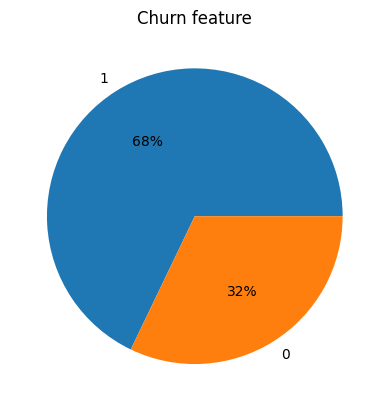

In [ ]:
plt.pie(x = data1["Churn"].value_counts().reset_index()["Churn"],
        labels = data1["Churn"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Churn feature")

* 80% Loan applicant has Fully Paid and 20% applicant have not paid meaning Loantap should not have permitted loan for them
* This is the Target Variable
* we can see our data set is imbalanced as the Ratio is 4:1 for Fully Paid : Charged Off
* Further we have to balaned the data set ot use weight during training

## Age

In [ ]:
data1.Age.nunique()

35

In [ ]:
data1.Age.describe()

count    2381.000000
mean       33.090718
std         5.840686
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

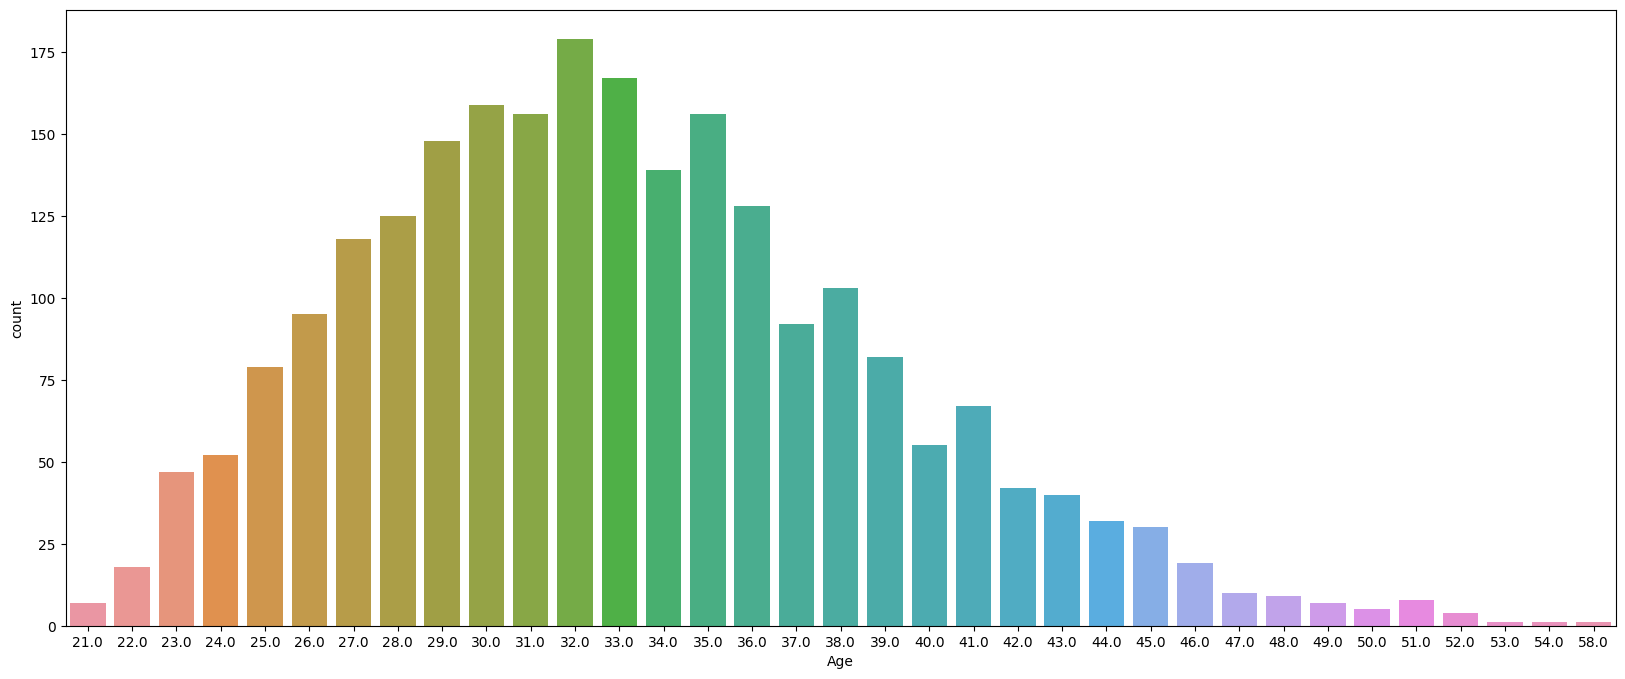

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x=data1["Age"])

In [ ]:
data1["Age"].describe()

count    2381.000000
mean       33.090718
std         5.840686
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64

* Lets bin the Age ranges

In [48]:
data1["Age_bins"] = pd.cut(data1["Age"], bins = [20,30,40,50,60],
                           labels=(1,2,3,4))

In [49]:
data1["Age_bins"].value_counts()

2    1257
1     848
3     261
4      15
Name: Age_bins, dtype: int64

<Axes: xlabel='Age_bins', ylabel='count'>

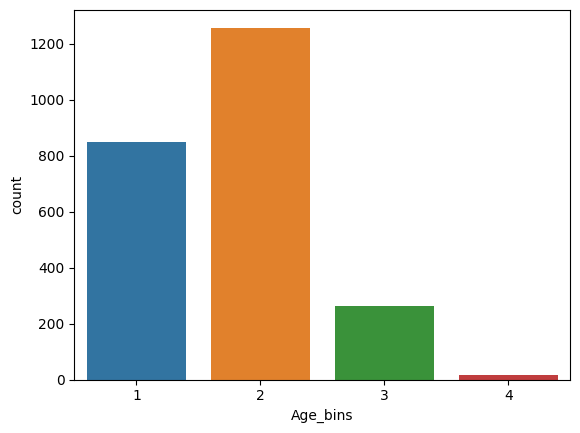

In [50]:
sns.countplot(x=data1["Age_bins"])

In [51]:
pd.crosstab(data1["Age_bins"],data1["Churn"],normalize = "index")

Churn,0,1
Age_bins,,
1,0.298349,0.701651
2,0.340493,0.659507
3,0.306513,0.693487
4,0.266667,0.733333


## Gender

In [ ]:
data1["Gender"].value_counts()

0.0    1404
1.0     977
Name: Gender, dtype: int64

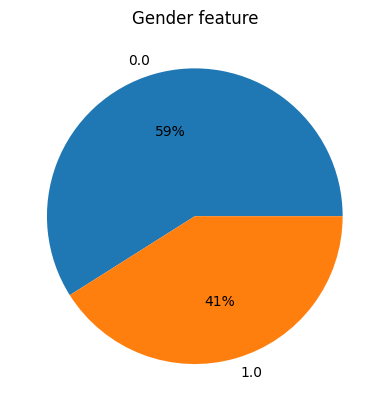

In [ ]:
plt.pie(x = data1["Gender"].value_counts().reset_index()["Gender"],
        labels = data1["Gender"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Gender feature")
plt.show()

In [ ]:
pd.crosstab(data1["Gender"],data1["Churn"],normalize = "index")

Churn,0,1
Gender,,
0.0,0.324786,0.675214
1.0,0.316274,0.683726


* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Months
* loan_status Charged off have more accounts with term as 60 months

## Education_Level

<Axes: xlabel='Education_Level', ylabel='count'>

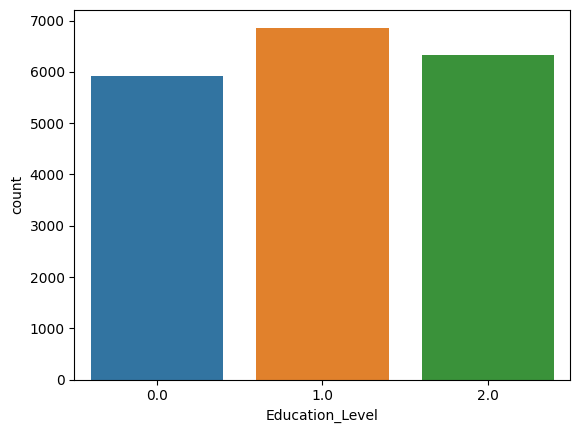

In [ ]:
sns.countplot(x= data["Education_Level"])

In [ ]:
pd.crosstab(data1["Education_Level"],data1["Churn"],normalize = "index")

Churn,0,1
Education_Level,,
0.0,0.308673,0.691327
1.0,0.337107,0.662893
2.0,0.317955,0.682045


* Loan Amount Range from 500 ~ 40000
* We can see high spikes of count in the loan amount at multiples of 5000
* However 75% amount of loan lie between 0 ~ 20000
* On an Average , Charged Off accounts have more Loan amount

## Joining Designation

<Axes: xlabel='Joining Designation', ylabel='count'>

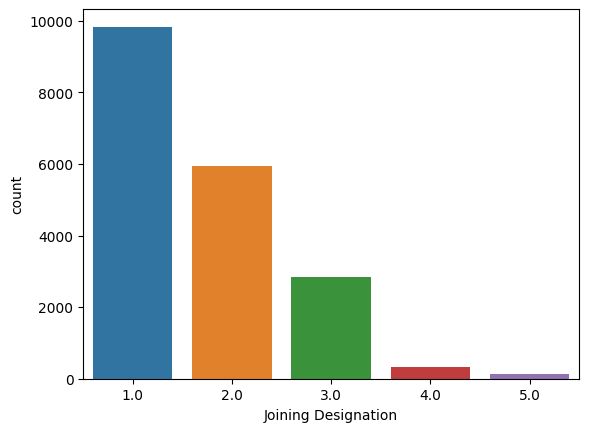

In [ ]:
sns.countplot(x= data["Joining Designation"])

In [ ]:
pd.crosstab(data1["Joining Designation"],data1["Churn"],normalize = "index")

Churn,0,1
Joining Designation,,
1.0,0.267057,0.732943
2.0,0.312883,0.687117
3.0,0.444219,0.555781
4.0,0.388889,0.611111
5.0,0.272727,0.727273


* Loan Amount Range from 500 ~ 40000
* We can see high spikes of count in the loan amount at multiples of 5000
* However 75% amount of loan lie between 0 ~ 20000
* On an Average , Charged Off accounts have more Loan amount

## Total Business Value

In [ ]:
data1["Total Business Value"].describe()

count    2.381000e+03
mean     3.120854e+05
std      4.495705e+05
min     -1.979329e+05
25%      0.000000e+00
50%      1.506244e+05
75%      4.294988e+05
max      3.972128e+06
Name: Total Business Value, dtype: float64

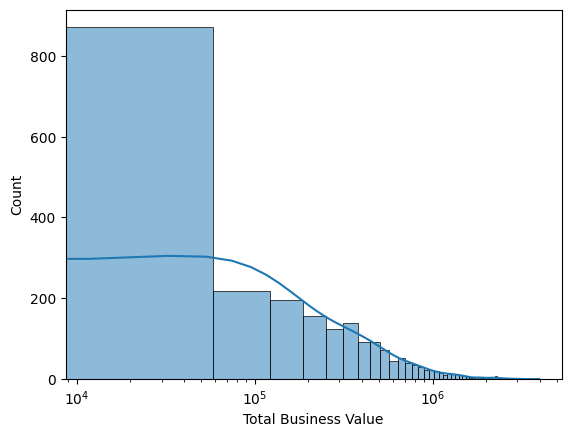

In [ ]:
sns.histplot(data1["Total Business Value"],kde = True )
plt.xscale("log")

## City

In [ ]:
data1["City"].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

<Axes: xlabel='City', ylabel='count'>

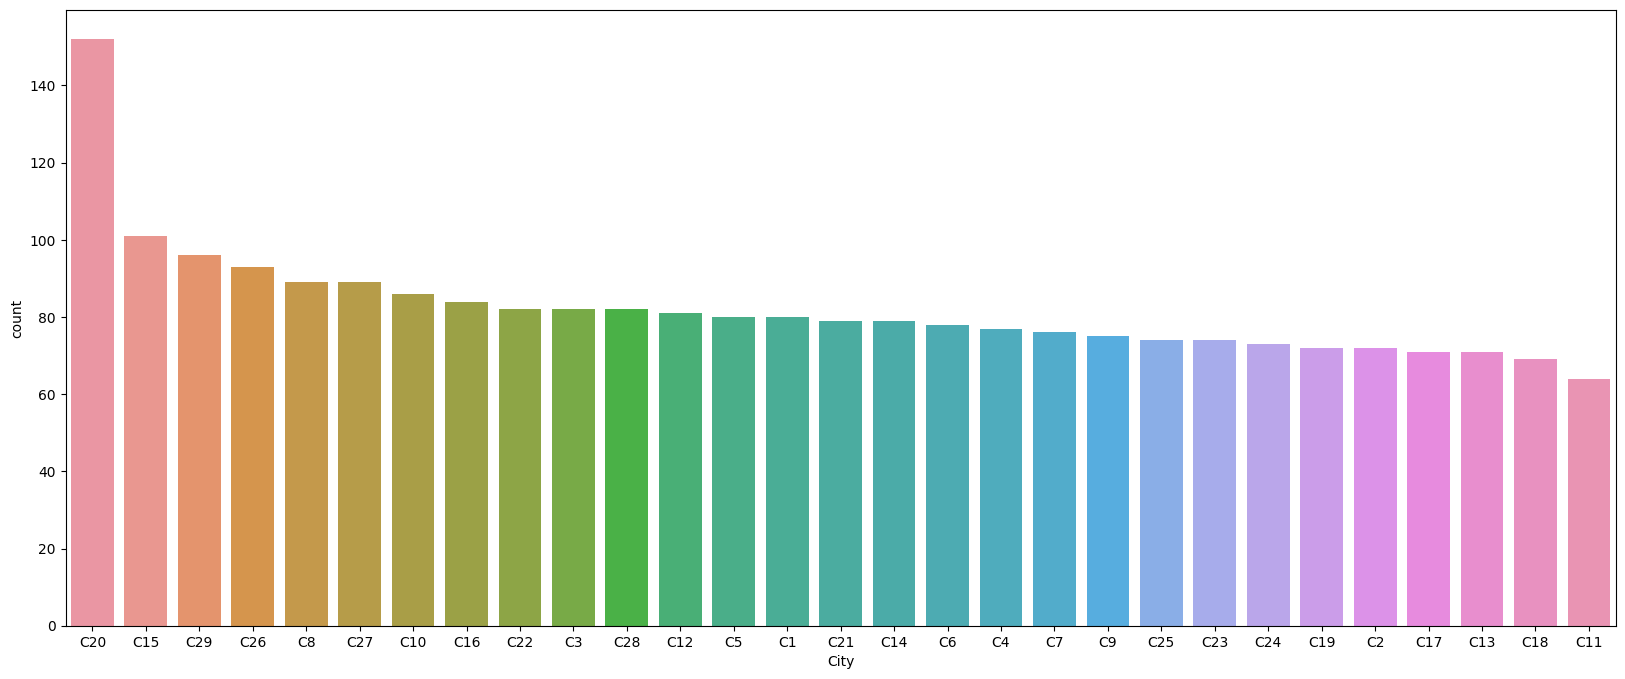

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data1, x= "City" ,order = data1["City"].value_counts().index)

<Axes: xlabel='City', ylabel='count'>

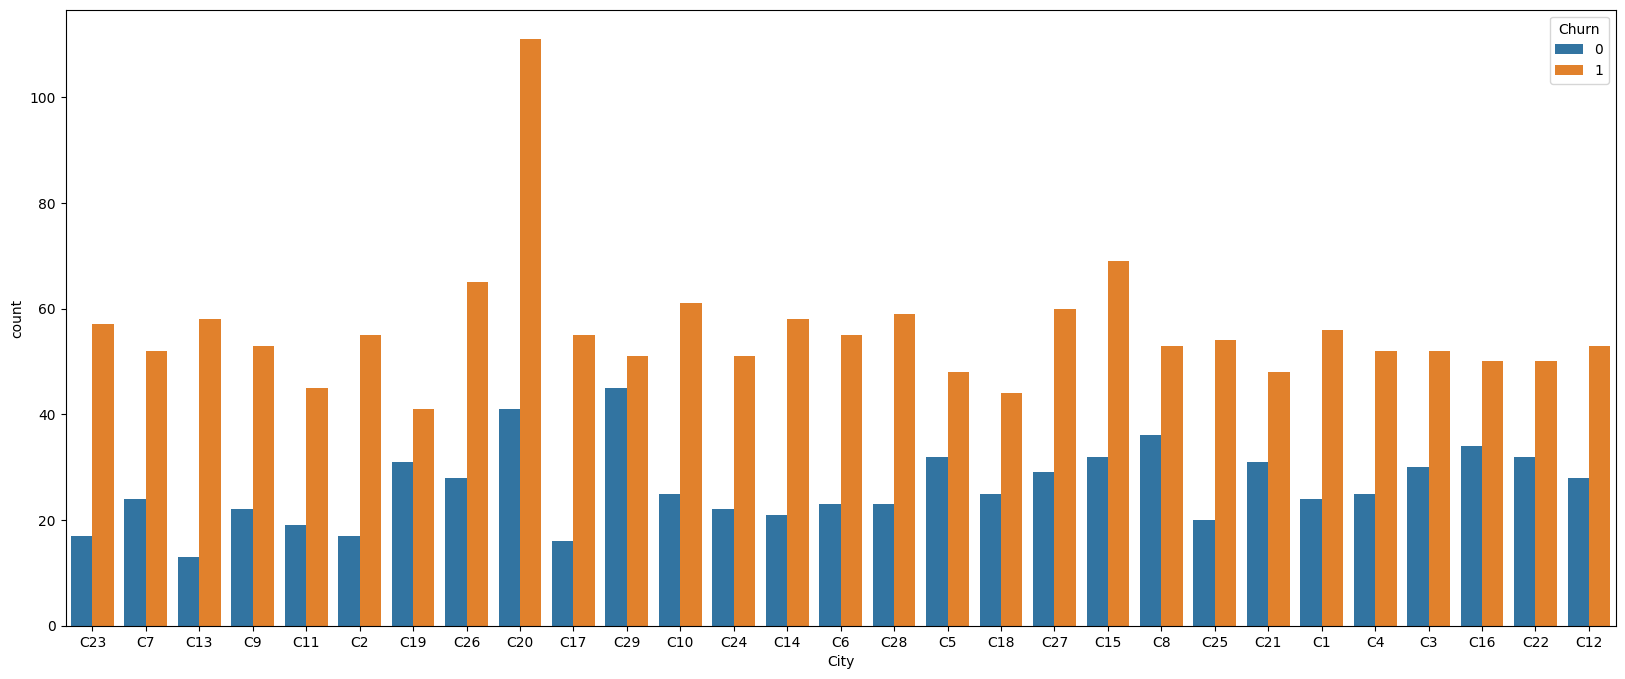

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data1, hue="Churn", x= "City")

In [ ]:
pd.crosstab(data1["City"],data1["Churn"],normalize = "index").reset_index().sort_values(1,ascending = False)[:10]

Churn,City,0,1
4,C13,0.183099,0.816901
8,C17,0.225352,0.774648
15,C23,0.229730,0.770270
11,C2,0.236111,0.763889
5,C14,0.265823,0.734177
12,C20,0.269737,0.730263
17,C25,0.270270,0.729730
20,C28,0.280488,0.719512
1,C10,0.290698,0.709302
28,C9,0.293333,0.706667


* 7 Types of grade have been assigned for each loan from A ~ G
* highest number of Loans are classified as Grade B and very less no of loan avaiable in Grade G
* "int_rate" approximately increase from A to G
* A grade Borrower have Less Charged off to Fully Paid  Ratio whereas as we move from B-->C-->D-->E-->F-->G Charged off to Fully Paid  Ratio increased

In [ ]:
data1.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Total Business Value', 'Income', 'Quarterly Rating', 'Grade', 'Churn'],
      dtype='object')

## Income

In [ ]:
data1["Income"].value_counts()

0    2338
1      43
Name: Income, dtype: int64

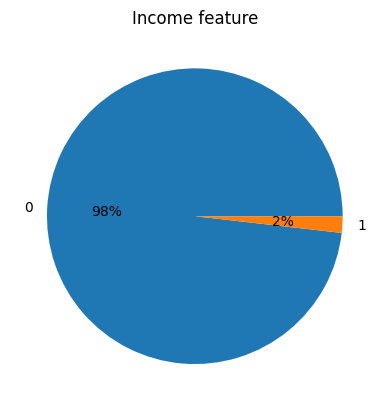

In [ ]:
plt.pie(x = data1["Income"].value_counts().reset_index()["Income"],
        labels = data1["Income"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Income feature")
plt.show()

In [ ]:
pd.crosstab(data1["Income"],data1["Churn"],normalize = "index")

Churn,0,1
Income,,
0,0.310094,0.689906
1,0.930233,0.069767


* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Months
* loan_status Charged off have more accounts with term as 60 months

## Quarterly Rating

In [ ]:
data1["Quarterly Rating"].value_counts()

0    2023
1     358
Name: Quarterly Rating, dtype: int64

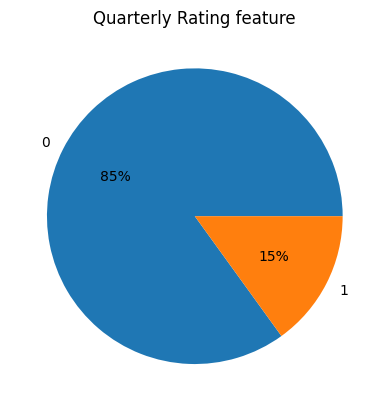

In [ ]:
plt.pie(x = data1["Quarterly Rating"].value_counts().reset_index()["Quarterly Rating"],
        labels = data1["Quarterly Rating"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Quarterly Rating feature")
plt.show()

In [ ]:
pd.crosstab(data1["Quarterly Rating"],data1["Churn"],normalize = "index")

Churn,0,1
Quarterly Rating,,
0,0.24172,0.75828
1,0.77095,0.22905


* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Months
* loan_status Charged off have more accounts with term as 60 months

## Grade

In [ ]:
data1["Grade"].value_counts()

0    2338
1      43
Name: Grade, dtype: int64

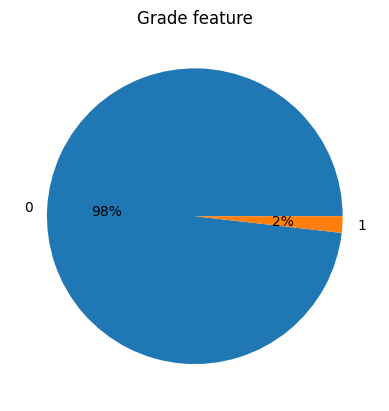

In [ ]:
plt.pie(x = data1["Grade"].value_counts().reset_index()["Grade"],
        labels = data1["Grade"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Grade feature")
plt.show()

In [ ]:
pd.crosstab(data1["Grade"],data1["Churn"],normalize = "index")

Churn,0,1
Grade,,
0,0.310094,0.689906
1,0.930233,0.069767


* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Months
* loan_status Charged off have more accounts with term as 60 months

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [ ]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in ["Total Business Value"]:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data1[z],75) - np.percentile(data1[z],25)
    lower_limit = np.percentile(data1[z],25) - 1.5*IQR
    upper_limit = np.percentile(data1[z],75) + 1.5*IQR
    outlier[z] = (data1[z]>upper_limit) | (data1[z]<lower_limit)

    print("Minimum -->",data1[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data1[z],25))
    print("Median -->",np.percentile(data1[z],50))
    print("Quantile75 -->",np.percentile(data1[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data1[z].max())

    print()
    print("Out of ",len(data1[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data1[z])*100),2),"%")
    print()
    print("*******************************************************************")

Total Business Value Feature
*******************************************************************
Minimum --> -197932.85714285713
Lower Limit --> -644248.125
Quantile25 --> 0.0
Median --> 150624.44444444444
Quantile75 --> 429498.75
Upper Limit --> 1073746.875
Maximum --> 3972127.5

Out of  2381 Data points , There are 148 Outliers
Percentage of Outliers: 6.22 %

*******************************************************************


## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

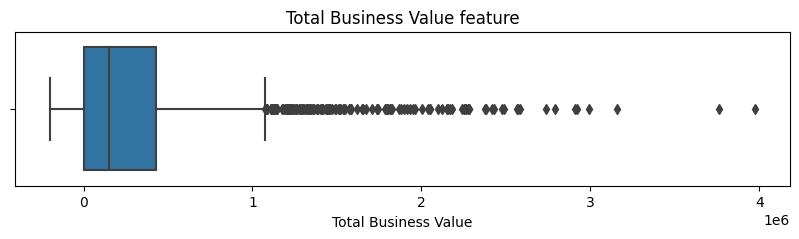

In [ ]:
for z in ["Total Business Value"]:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data1, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* From above graph we can see Total Bussiness Value have Outliers
* But Some of the Outliers have Relevance , so we will not treat all the outlier
* We will Convert the Total Bussiness Values into Categories base on percentile using pd.cut
** Minimum --> -197932.85714285713
** Lower Limit --> -644248.125
** Quantile25 --> 0.0
** Median --> 150624.44444444444
** Quantile75 --> 429498.75
** Upper Limit --> 1073746.875
** Maximum --> 3972127.5
** [-197932.85714285713,0.0,150624.44444444444,429498.75,1073746.875,3972127.5]

In [52]:
data1["TBV_bins"] = pd.cut(data1["Total Business Value"], bins = [-197935,0.0,150624,429498,1073746,3972128],
                           labels=(1,2,3,4,5))

In [53]:
data1['TBV_bins'].value_counts()

1    729
3    595
2    461
4    448
5    148
Name: TBV_bins, dtype: int64

* Total Bussiness Value data have converted to Bins , thereby we addressed Outliers and maintained the significance of the Values through Ordinal Coding

# **Feature Engineering**

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               2381 non-null   float64 
 1   City                 2381 non-null   object  
 2   Education_Level      2381 non-null   float64 
 3   Joining Designation  2381 non-null   float64 
 4   Income               2381 non-null   int64   
 5   Quarterly Rating     2381 non-null   int64   
 6   Grade                2381 non-null   int64   
 7   Churn                2381 non-null   int64   
 8   Age_bins             2381 non-null   category
 9   TBV_bins             2381 non-null   category
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 172.5+ KB


## Eliminate Reduntant features

* We can drop features - "Age","Total Business Value " as we have already created similar feature using pd.cut

In [54]:
data1.drop(["Age","Total Business Value"], inplace = True, axis=1)

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               2381 non-null   float64 
 1   City                 2381 non-null   object  
 2   Education_Level      2381 non-null   float64 
 3   Joining Designation  2381 non-null   float64 
 4   Income               2381 non-null   int64   
 5   Quarterly Rating     2381 non-null   int64   
 6   Grade                2381 non-null   int64   
 7   Churn                2381 non-null   int64   
 8   Age_bins             2381 non-null   category
 9   TBV_bins             2381 non-null   category
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 172.5+ KB


* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

* we have to Convert Feature "City" from Categorical to Numerical

* First Let Encode our Target Variable

In [ ]:
data1["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

Now let encode rest of the Categorical Features

* we will follow below encoding Strategy for rest of categorical features
* if Feature wise unique Value[n]
** n<=2 --> LabelEncoder
** 3<= n <=5 --> One Hot Encoding
** n >5 -->Target Encoding

In Feature "City", we have 29 Categories, so we will use Target Encoder

In [ ]:
data1.City.nunique()

29

In [57]:
te=TargetEncoder()
data1["City"]=te.fit_transform(data1["City"],data1["Churn"])

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               2381 non-null   float64 
 1   City                 2381 non-null   float64 
 2   Education_Level      2381 non-null   float64 
 3   Joining Designation  2381 non-null   float64 
 4   Income               2381 non-null   int64   
 5   Quarterly Rating     2381 non-null   int64   
 6   Grade                2381 non-null   int64   
 7   Churn                2381 non-null   int64   
 8   Age_bins             2381 non-null   category
 9   TBV_bins             2381 non-null   category
dtypes: category(2), float64(4), int64(4)
memory usage: 172.5 KB


In [ ]:
data1.head()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,TBV_bins,Age_bins
0,0.0,0.769859,2.0,1.0,0,0,0,1,4,1
1,0.0,0.684190,2.0,2.0,0,0,0,0,1,2
2,0.0,0.816064,2.0,2.0,0,0,0,1,2,4
3,0.0,0.706553,0.0,1.0,0,0,0,1,2,1
4,1.0,0.702829,1.0,3.0,0,1,0,0,3,2


## Scaling of Numerical Categories

* Let us do KS test for Goodness of Fit to check for  Normal Distribution in order to decide the type of scaler ot be used [ Minmax or Standard Scaler]

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data1.columns:
  test_stat, p_value = kstest(data1[i],stats.norm.cdf)
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

0.0
Reject H0
Gender Data is Not Gaussian

0.0
Reject H0
City Data is Not Gaussian

0.0
Reject H0
Education_Level Data is Not Gaussian

0.0
Reject H0
Joining Designation Data is Not Gaussian

0.0
Reject H0
Income Data is Not Gaussian

0.0
Reject H0
Quarterly Rating Data is Not Gaussian

0.0
Reject H0
Grade Data is Not Gaussian

0.0
Reject H0
Churn Data is Not Gaussian

0.0
Reject H0
TBV_bins Data is Not Gaussian

0.0
Reject H0
Age_bins Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Standardization
* Now we will do Normalization using Minmax Scaler



In [59]:
Normscaler = MinMaxScaler()

In [60]:
scaleddata = Normscaler.fit_transform(data1)

In [61]:
scaleddata

array([[0.        , 0.83772787, 1.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.        , 0.53686301, 1.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 0.66666667,
        0.25      ],
       ...,
       [0.        , 0.13598406, 0.        , ..., 1.        , 0.66666667,
        0.5       ],
       [1.        , 0.6986695 , 1.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.50164366, 1.        , ..., 0.        , 0.        ,
        0.5       ]])

In [62]:
scaleddata = pd.DataFrame(scaleddata,columns = data1.columns)

In [63]:
scaleddata

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,Age_bins,TBV_bins
0,0.0,0.837728,1.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.75
1,0.0,0.536863,1.0,0.25,0.0,0.0,0.0,0.0,0.333333,0.00
2,0.0,1.000000,1.0,0.25,0.0,0.0,0.0,1.0,0.666667,0.25
3,0.0,0.615400,0.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.25
4,1.0,0.602321,0.5,0.50,0.0,1.0,0.0,0.0,0.333333,0.50
...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.587228,0.0,0.25,0.0,1.0,0.0,0.0,0.333333,0.75
2377,1.0,0.615400,0.0,0.00,0.0,0.0,0.0,1.0,0.333333,0.00
2378,0.0,0.135984,0.0,0.25,0.0,0.0,0.0,1.0,0.666667,0.50
2379,1.0,0.698669,1.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.50


In [64]:
scaleddata.describe()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,Age_bins,TBV_bins
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.410332,0.517447,0.503780,0.205061,0.018060,0.150357,0.018060,0.678706,0.255355,0.376627
std,0.491997,0.229527,0.408145,0.210358,0.133195,0.357496,0.133195,0.467071,0.220209,0.317436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.361427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.587228,0.500000,0.250000,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000
75%,1.000000,0.660622,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.333333,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate - Correlation Matrix

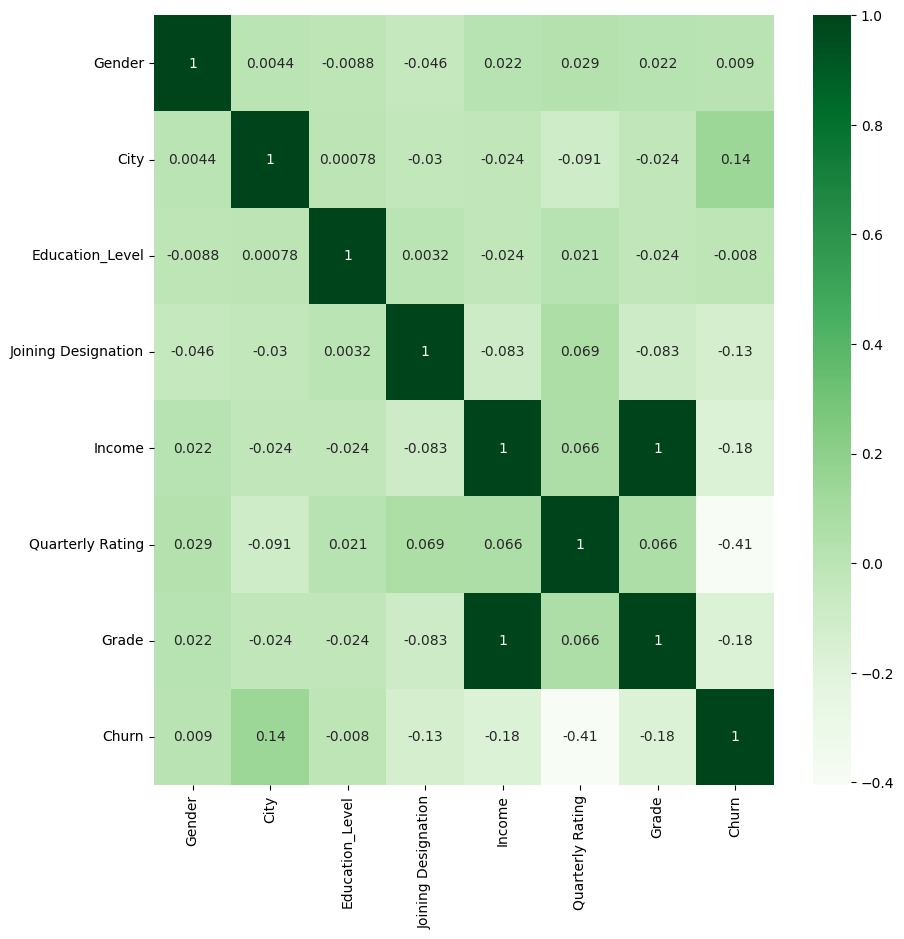

In [65]:
plt.figure(figsize =(10,10))
sns.heatmap(data1.corr(),annot=True,cmap = "Greens")
plt.show()

* Income and Grade Feature feature are Perfectly Correlated
* Basically these are Flag --> if "1" Driver Income increases similarily if "1" Driver Grade Increase
* So we will drop Grade Feature

In [66]:
scaleddata.drop(["Grade"], inplace = True, axis=1)

In [67]:
scaleddata.head()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Churn,Age_bins,TBV_bins
0,0.0,0.837728,1.0,0.00,0.0,0.0,1.0,0.000000,0.75
1,0.0,0.536863,1.0,0.25,0.0,0.0,0.0,0.333333,0.00
2,0.0,1.000000,1.0,0.25,0.0,0.0,1.0,0.666667,0.25
3,0.0,0.615400,0.0,0.00,0.0,0.0,1.0,0.000000,0.25
4,1.0,0.602321,0.5,0.50,0.0,1.0,0.0,0.333333,0.50


## Final data - Dividing Data for Training & Test

* Our desired Outcome is "Churn"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaleddata.drop(["Churn"], axis = 1), scaleddata["Churn"], test_size=0.2, random_state=32)

In [72]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1904, 8), (477, 8), (1904,), (477,))

# **Data Balancing**

In [73]:
ytrain.value_counts()

1.0    1286
0.0     618
Name: Churn, dtype: int64

In [74]:
1286/618

2.0809061488673137

* Data is Highly Imbalance, More data points are avaiable for churned Driver
* So we will use SMOTE to Blance Data

In [79]:
from imblearn.over_sampling import SMOTE
print('Before SMOTE')
print(ytrain.value_counts())

Xtrainsm, ytrainsm = SMOTE().fit_resample(Xtrain,ytrain)
print('After Oversampling')
print(ytrainsm.value_counts())

Before SMOTE
1.0    1286
0.0     618
Name: Churn, dtype: int64
After Oversampling
1.0    1286
0.0    1286
Name: Churn, dtype: int64


* Now our data is balanced

# **Model Training - Random Forest[Ensemble - Bagging]**

In [208]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=7, n_estimators=50)

In [209]:
rf_clf.fit(Xtrainsm,ytrainsm)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=7)

## Accuracy

In [ ]:
rf_clf.score(Xtrainsm,ytrainsm)

0.8114307931570762

In [ ]:
ypred = rf_clf.predict(Xtest)

In [ ]:
rf_clf.score(Xtest,ytest)

0.7945492662473794

* 79% Predictions by our model are accurate

## Precision

In [ ]:
precision_score(ytest, ypred)

0.8411764705882353

* 84% of all Positive prediction are actually positve

## Recall

In [ ]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts 87% of all actual Positives as postives

## F1 Score

In [ ]:
f1_score(ytest,ypred)

0.853731343283582

* From F1_score of 0.85, we can say Our model has almost good balance between reducing False Positives[Detect as Churner but not] and False Negative[Actually Churner but detect as not Churner]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 93,  54],
       [ 44, 286]])

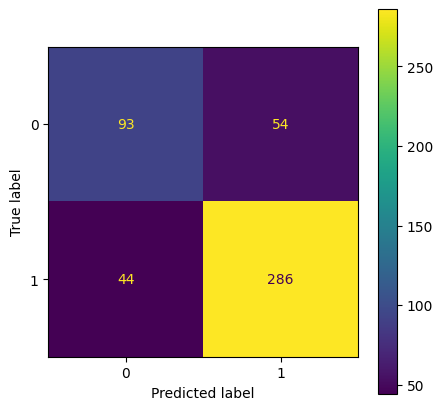

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost same, But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones
* So we will focus on Improving Recall at moderate expense of Precision


## ROC

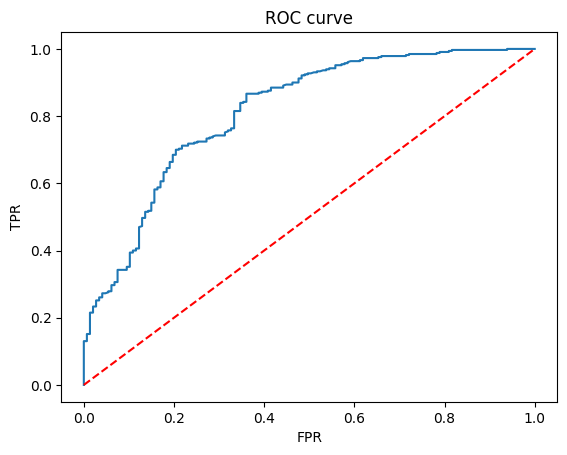

In [ ]:
probability = rf_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(ytest,probabilites)

0.8134611420325706

roc_auc_score is 0.94 meaning our model can 81% efficiently Distinguish Positve and Neagative Classes

## Precision Recall Curve

In [ ]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

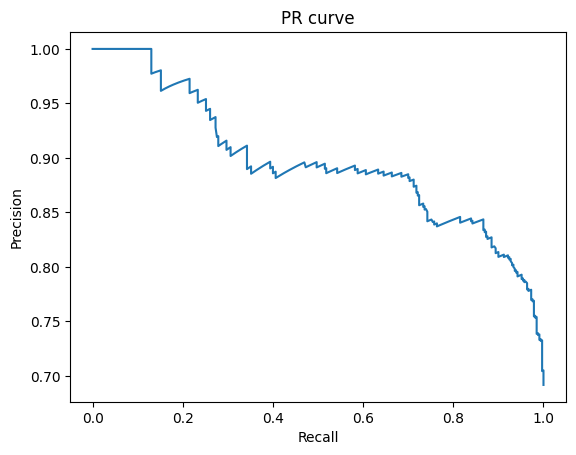

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8957804551237599

* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

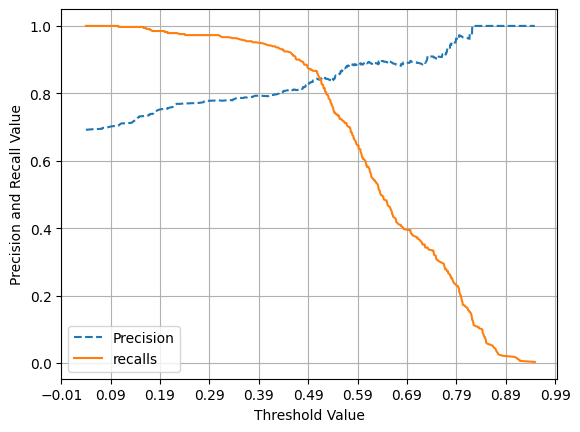

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
           label="Precision")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)

## Classification Report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       147
         1.0       0.84      0.87      0.85       330

    accuracy                           0.79       477
   macro avg       0.76      0.75      0.75       477
weighted avg       0.79      0.79      0.79       477



* our Random Forest Model can detect attrition driver with
** 84% Precision
** 87% Recall
** 79% Accuracy
** 85% F1-Score

## Changing Classification Threshold for Better Recall

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Churning Driver
* So in order to increase Recall of our Model, we can reduce the Threshold from Default 0.5 --> 0.43 to get better Recall result at little degrading precision result[which is ok as per company assement]
* No we will check the Model perfromance on test data with New threshold

In [ ]:
ypredthres_043 = (rf_clf.predict_proba(Xtest)[:, 1] >= 0.43).astype(int)

In [ ]:
recall_score(ytest, ypredthres_043)

0.9333333333333333

In [ ]:
precision_score(ytest, ypredthres_043)

0.8

In [ ]:
f1_score(ytest,ypredthres_043)

0.8615384615384616

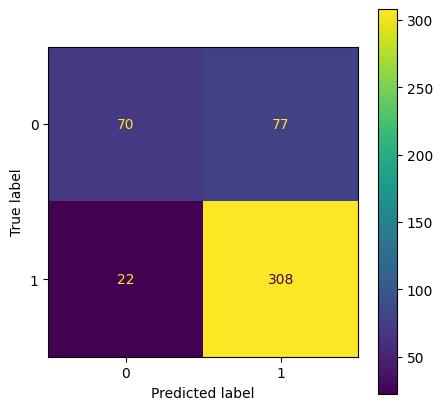

In [ ]:
conf_matrix = confusion_matrix(ytest, ypredthres_043)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* After Threshold Change from 0.5 --> 0.43 ,our Random Forest Model can detect attrition driver with
** Precision: 84% --> 80%
** Recall : 87% --> 93%
** Accuracy: No change 79%
** F1-Score : 85% --> 86%

# **Model Training - Gradient Bossting DT [Ensemble - Boosting]**

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth=7,learning_rate=0.1,random_state=7)
gb_clf.fit(Xtrainsm,ytrainsm)
ypred = gb_clf.predict(Xtest)

In [182]:
gb_clf.score(Xtrainsm,ytrainsm)

0.9284603421461898

In [183]:
gb_clf.score(Xtest,ytest)

0.7651991614255765

In [188]:
ypred = gb_clf.predict(Xtest)

In [233]:
precision_score(ytest, ypred)

0.8101983002832861

In [190]:
recall_score(ytest, ypred)

0.8666666666666667

In [191]:
f1_score(ytest,ypred)

0.8362573099415205

In [192]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 79,  68],
       [ 44, 286]])

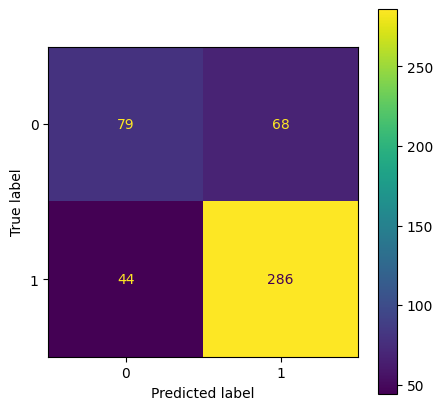

In [193]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

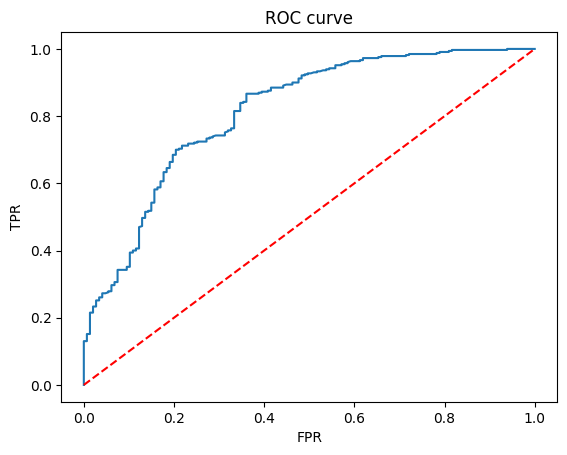

In [194]:
probability = rf_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [195]:
roc_auc_score(ytest,probabilites)

0.8134611420325706

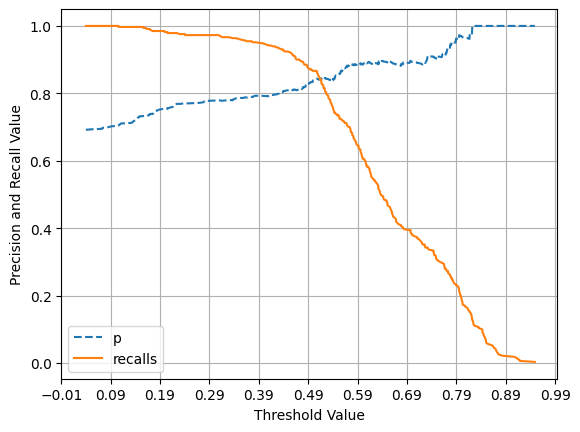

In [196]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="p")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)


## Accuracy

In [235]:
gb_clf.score(Xtrainsm,ytrainsm)

0.9284603421461898

In [236]:
ypred = gb_clf.predict(Xtest)

In [237]:
gb_clf.score(Xtest,ytest)

0.7651991614255765

* 76% Predictions by our model are accurate

## Precision

In [238]:
precision_score(ytest, ypred)

0.807909604519774

* 80% of all Positive prediction are actually positve

## Recall

In [239]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts 87% of all actual Positives as postives

## F1 Score

In [240]:
f1_score(ytest,ypred)

0.8362573099415205

* From F1_score of 0.83, we can say Our model has almost good balance between reducing False Positives[Detect as attrition driver but not] and False Negative[Actually attrition driver but detect as not attrition]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [241]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 79,  68],
       [ 44, 286]])

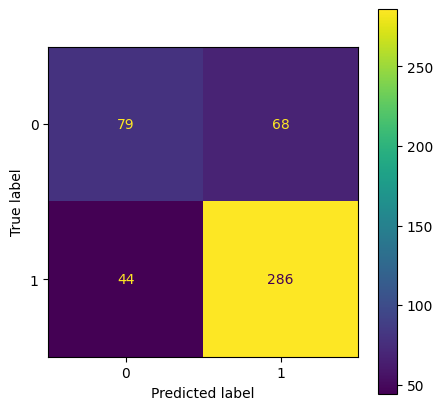

In [242]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost 10% & 6% , But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones
* So we will focus on Improving Recall at moderate expense of Precision


## ROC

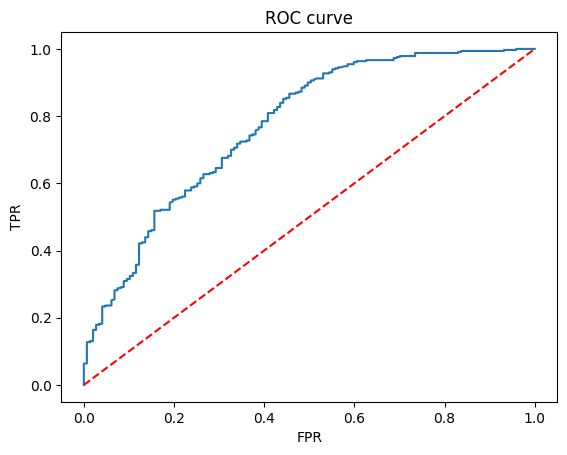

In [243]:
probability = gb_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [244]:
roc_auc_score(ytest,probabilites)

0.7706761492475778

roc_auc_score is 0.77 meaning our model can 77% efficiently Distinguish Positve and Neagative Classes

## Precision Recall Curve

In [245]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

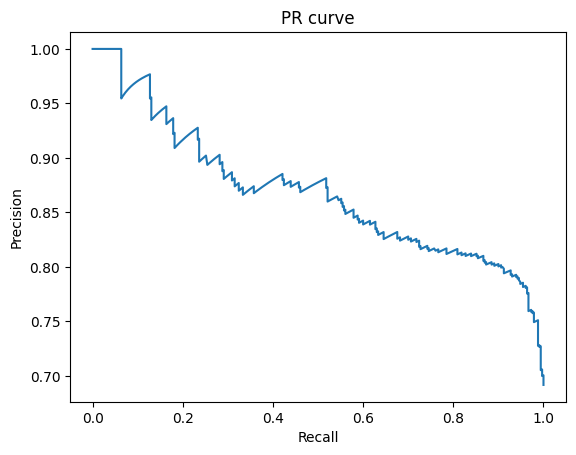

In [246]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [247]:
auc(recall, precision)

0.8678787549538943

* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

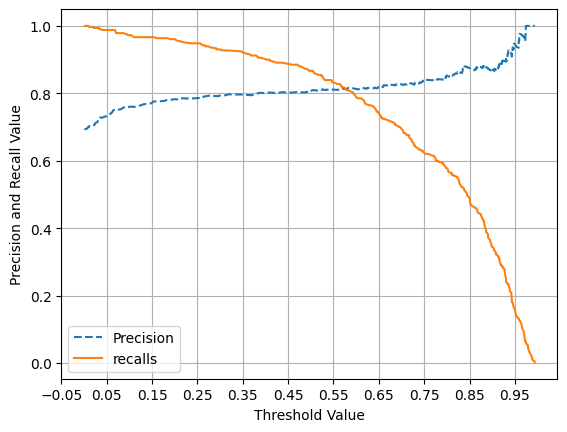

In [248]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
           label="Precision")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)

## Classification Report

In [249]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       147
         1.0       0.81      0.87      0.84       330

    accuracy                           0.77       477
   macro avg       0.73      0.70      0.71       477
weighted avg       0.76      0.77      0.76       477



* our GBDT Model can detect attrition driver with
** 81% Precision
** 87% Recall
** 77% Accuracy
** 84% F1-Score

## Changing Classification Threshold for Better Recall

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Churning Driver
* So in order to increase Recall of our Model, we can reduce the Threshold from Default 0.5 --> 0.37 to get better Recall result at little degrading precision result[which is ok as per company assement]
* No we will check the Model perfromance on test data with New threshold

In [250]:
ypredthres_037 = (rf_clf.predict_proba(Xtest)[:, 1] >= 0.37).astype(int)

In [251]:
recall_score(ytest, ypredthres_037)

0.9545454545454546

In [252]:
precision_score(ytest, ypredthres_037)

0.7894736842105263

In [253]:
f1_score(ytest,ypredthres_037)

0.8641975308641975

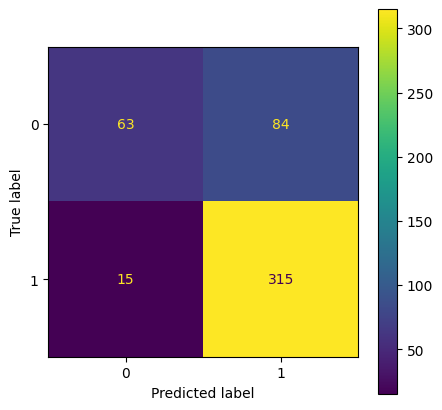

In [254]:
conf_matrix = confusion_matrix(ytest, ypredthres_037)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* After Threshold Change from 0.5 --> 0.37 ,our GBDT Model can detect attrition driver with
** Precision: 81% --> 78%
** Recall : 87% --> 95%
** Accuracy: No change 77%
** F1-Score : 84% --> 86%

# **Bussiness Insights**

## Exploratory Data Analysis

* From Target Variable Loan Status: 80% Loan applicant has Fully Paid and 20% applicant have not paid meaning Loantap should not have permitted loan for them
* Data set is highly imbalanced as the Ratio is 4:1 for Fully Paid : Charged Off
* On an Average , Charged Off accounts have more Loan amount,int_rate,Installment
* A grade Borrower have Less Charged off to Fully Paid Ratio whereas as we move from B-->C-->D-->E-->F-->G Charged off to Fully Paid Ratio increased
* As we moved from A1--> A5 --> B1 -->G4--> G5 , Ratio of Fully paid to Charged off Loan Status Reduced
* Rented home_ownership borrowers have high chance of Charged_off Loan status among all home_ownership type
* Fully paid to Charged Off Ratio reamained same irrespective of emp_length
* On an average, Fully Paid Borrowers has more annual Income than Charged_off Borrowers
* Suprisingly Not Verified Borrower have high Ratio of Fully Paid to Charged Off members
* Borrowers of Small_bussiness purpose have high propability of Charged off
* Borrowers of Wedding purpose have low propability of Charged of
* Borrowers of Small_bussiness purpose have high propability of Charged off
* On an Average DTI is high from Charged_Off Borrower
* Borrowing history is slightly high for Fully Paid Borrowers
* On an Average Charged off Borrowers have high Open Credit Line
* On an Average Public Derogatory Accounts are high for Charged Off Borrower
* On an Average, Total credit revolving balance is high for Fully Paid Borrowers
* The amount of credit the borrower is using relative to all available revolving credit is high for Charged off Borrowers compared to Fully Paid Borrowers
* No of Open Credit Line Percentage of all Credit line is highest for Charged Off Borrowers
* Joint Application type has less propability of Charged Off and Direct_pay has Highest propability of Charged off
* On an Average No of Mortage_account High for Fully Paid Borrowers
* Loan Charged off Borrowers have high pub_rec_bankruptcies


## Model & Its paramater Inference

*

# **Recommendations**

* In order to improve the Model Following additional Features can be added
** Under graduation College Rating
** Extra Circular activity with an Unified Rating
** Personal Essay Rating
** Professional Working Experience
** Financial Status

* further we can get actual data of Admission [yes or No] of past History records  to understand the Actual Threshold for "Chance of Admit" to definetely get admitted

* With the help of above model, Jamboree can confidently guide the Students with exact course of action meaning what score/rating to improve to get admission to particular college


# **Questionnaire**

1. What percentage of customers have fully paid their Loan Amount?
> 80% Customer have fully paid Loan
2. Comment about the correlation between Loan Amount and Installment features
> Installment and loan_amnt have high positively Correlation[0.93]
3. The majority of people have home ownership as _______.
> 50% Applicants are of staying in Mortage Home[Majority]
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
> Yes "A" grade customer more likely to fully pay their Loan compared rest of B ~ G grades [93% of A grade Customer Fully Paid their Loan ]
5. Name the top 2 afforded job titles.
> Teacher and Manager are top 2 afforded job titles
6. Thinking from a bank's perspective, which metric should our primary focus be on
> **F1 Score: we don't want to miss potential customers and at the same time we also don't want to give loan to defaulter**
>* ROC AUC -->Not Prefered, as it determines efficiency of model in classifying Positives and Negative [only Classification]
>* Precision -> Not Prefered,Will Focus only on FP [reducing Defaulters]
>* Recall --> Not Prefered, will focus only on FN [not missing Potential Customers]
>* F1 Score--> Focus on both [gives importance to both precision and recall]
7. How does the gap in precision and recall affect the bank?
>* if Precision > Recall , Model more focus on reducing FP meaning banks more focus on detect more Defaulters whereas it is lossing the prospective Good Borrowers
>* if Precision < Recall , Model more focus on reducing FN meaning banks more focus on detect more prospective Good Borrowers whereas it might not dectect real Dafulters
8. Which were the features that heavily affected the outcome?
> **Address Code, Emp_title** Heavily Affected the Outcome of Prediction
9. Will the results be affected by geographical location?
> Yes, Result are affected by Geographical Location [Pincode of the Address has highest weight (27.8)]